In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')


In [22]:
data = pd.read_csv('../data/train_data.csv')
data.head()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Male,33.081600,1.705617,83.016968,yes,2.000000,2.991671,no,no,2.797600,Sometimes,yes,no,2.148738,0.000000,Automobile,Body Level 3
1,Female,26.000000,1.610636,105.423532,yes,3.000000,2.180566,Sometimes,no,3.000000,Sometimes,yes,no,0.000000,0.519905,Public_Transportation,Body Level 4
2,Female,18.000000,1.600000,55.000000,yes,2.000000,2.000000,Sometimes,no,4.000000,Frequently,no,no,2.000000,1.000000,Public_Transportation,Body Level 2
3,Male,30.607546,1.757132,118.565568,yes,2.918113,2.240463,Sometimes,no,3.000000,Sometimes,yes,no,1.076248,1.480875,Automobile,Body Level 4
4,Male,40.501722,1.744974,111.169678,yes,2.294259,1.870290,no,no,2.850948,Sometimes,yes,no,0.917014,0.000000,Automobile,Body Level 4


In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1181 non-null   object 
 1   Age                 1181 non-null   float64
 2   Height              1181 non-null   float64
 3   Weight              1181 non-null   float64
 4   H_Cal_Consump       1181 non-null   object 
 5   Veg_Consump         1181 non-null   float64
 6   Water_Consump       1181 non-null   float64
 7   Alcohol_Consump     1181 non-null   object 
 8   Smoking             1181 non-null   object 
 9   Meal_Count          1181 non-null   float64
 10  Food_Between_Meals  1181 non-null   object 
 11  Fam_Hist            1181 non-null   object 
 12  H_Cal_Burn          1181 non-null   object 
 13  Phys_Act            1181 non-null   float64
 14  Time_E_Dev          1181 non-null   float64
 15  Transport           1181 non-null   object 
 16  Body_L

In [24]:
data.describe()


,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,24.252256,1.702983,86.362350,2.413264,2.007627,2.699594,1.029156,0.652726
std,6.232881,0.094133,26.025678,0.547365,0.623985,0.788625,0.848838,0.599990
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.950605,1.629225,65.000000,2.000000,1.538626,2.667711,0.178856,0.000000
50%,22.758998,1.702002,82.628000,2.417635,2.000000,3.000000,1.000000,0.625079
75%,26.000000,1.770612,106.491410,3.000000,2.495944,3.000000,1.680844,1.000000
max,55.246250,1.980000,160.639405,3.000000,3.000000,4.000000,3.000000,2.000000


In [25]:
data['Body_Level'].unique()


array(['Body Level 3', 'Body Level 4', 'Body Level 2', 'Body Level 1'],
      dtype=object)

In [26]:
target = 'Body_Level'
numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump',
                      'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
categorical_features = list(
    set(data.columns) - set(numerical_features) - set([target]))


# Univariate Analysis


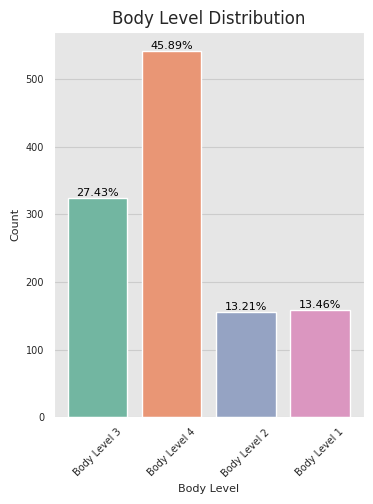

In [27]:
# target variable analysis
plt.figure(figsize=(4, 5))
sns.countplot(x=target, data=data, palette='Set2', ax=plt.gca())
# data[target].value_counts().plot(kind='bar', title='Body Level')
# add percentages
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}%'.format(100*p.get_height()/len(data)),
                   fontsize=8, color='black', ha='center', va='bottom')
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Body Level', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.title('Body Level Distribution')
plt.axis('tight')
plt.savefig('../figures/dataset_analysis/body_level_distribution.png',
            dpi=300, bbox_inches='tight')
# plt.show()


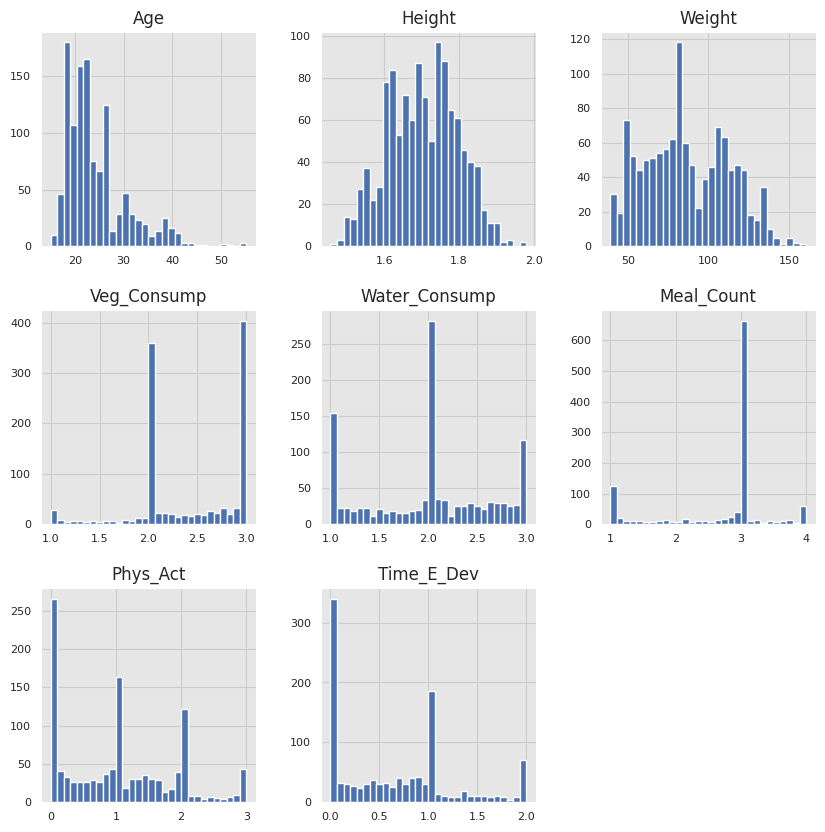

In [28]:
# numerical features analysis
data[numerical_features].hist(
    figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8)
plt.savefig('../figures/dataset_analysis/numerical_features_distribution.png',
            dpi=300, bbox_inches='tight')
plt.show()


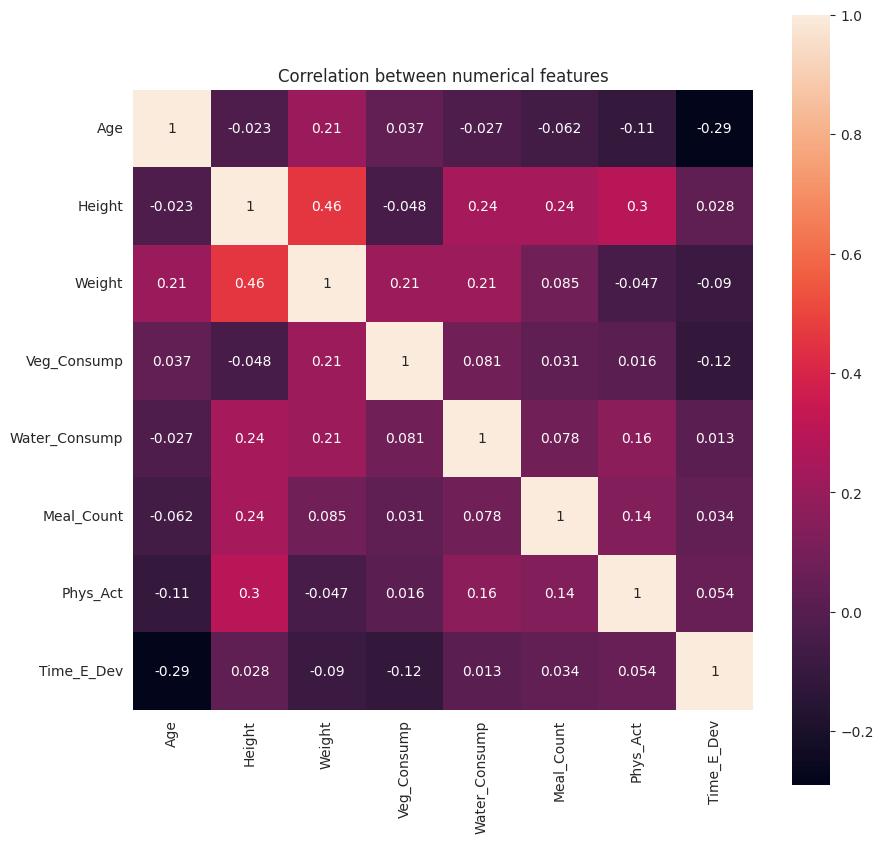

In [29]:
# correlation matrix
corr = data[numerical_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot=True,)
plt.title('Correlation between numerical features')
plt.savefig('../figures/dataset_analysis/correlation_matrix.png',
            dpi=300, bbox_inches='tight')
plt.show()


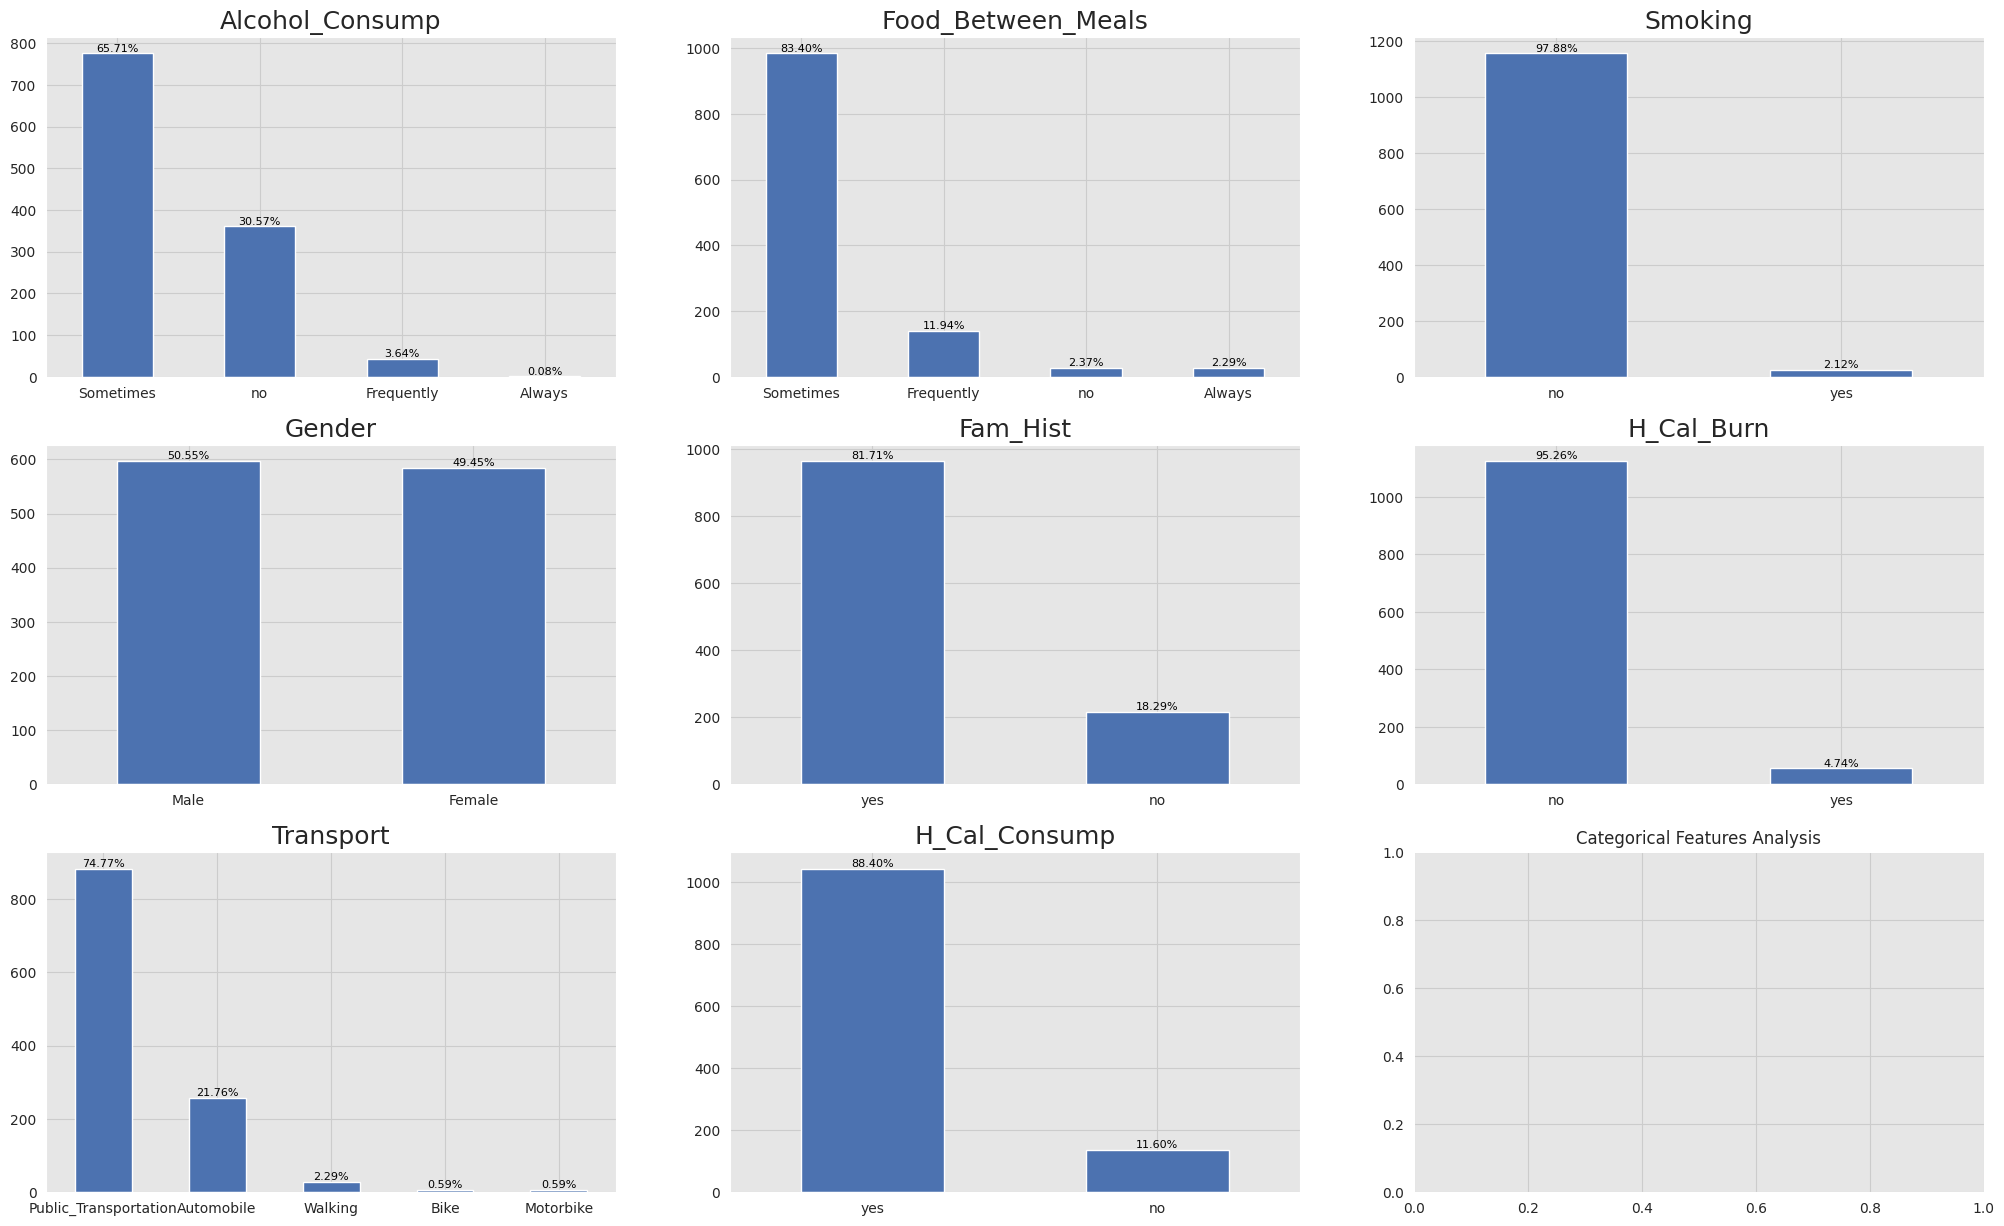

In [34]:
# categorical features analysis in the same plot
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
plt.title('Categorical Features Analysis')
for i, feature in enumerate(categorical_features):
    data[feature].value_counts().plot(
        kind='bar', ax=axes[i//3, i % 3], title=feature)
    # add percentages
    for p in axes[i//3, i % 3].patches:
        axes[i//3, i % 3].text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}%'.format(100*p.get_height()/len(data)),
                               fontsize=8, color='black', ha='center', va='bottom')
    axes[i//3, i % 3].set_xticklabels(axes[i//3, i %
                                      3].get_xticklabels(), rotation=0, fontsize=10)
    axes[i//3, i % 3].set_title(feature, fontsize=18)


plt.savefig('../figures/dataset_analysis/categorical_feature.png',
            dpi=300, bbox_inches='tight')


# Multivariate Analysis


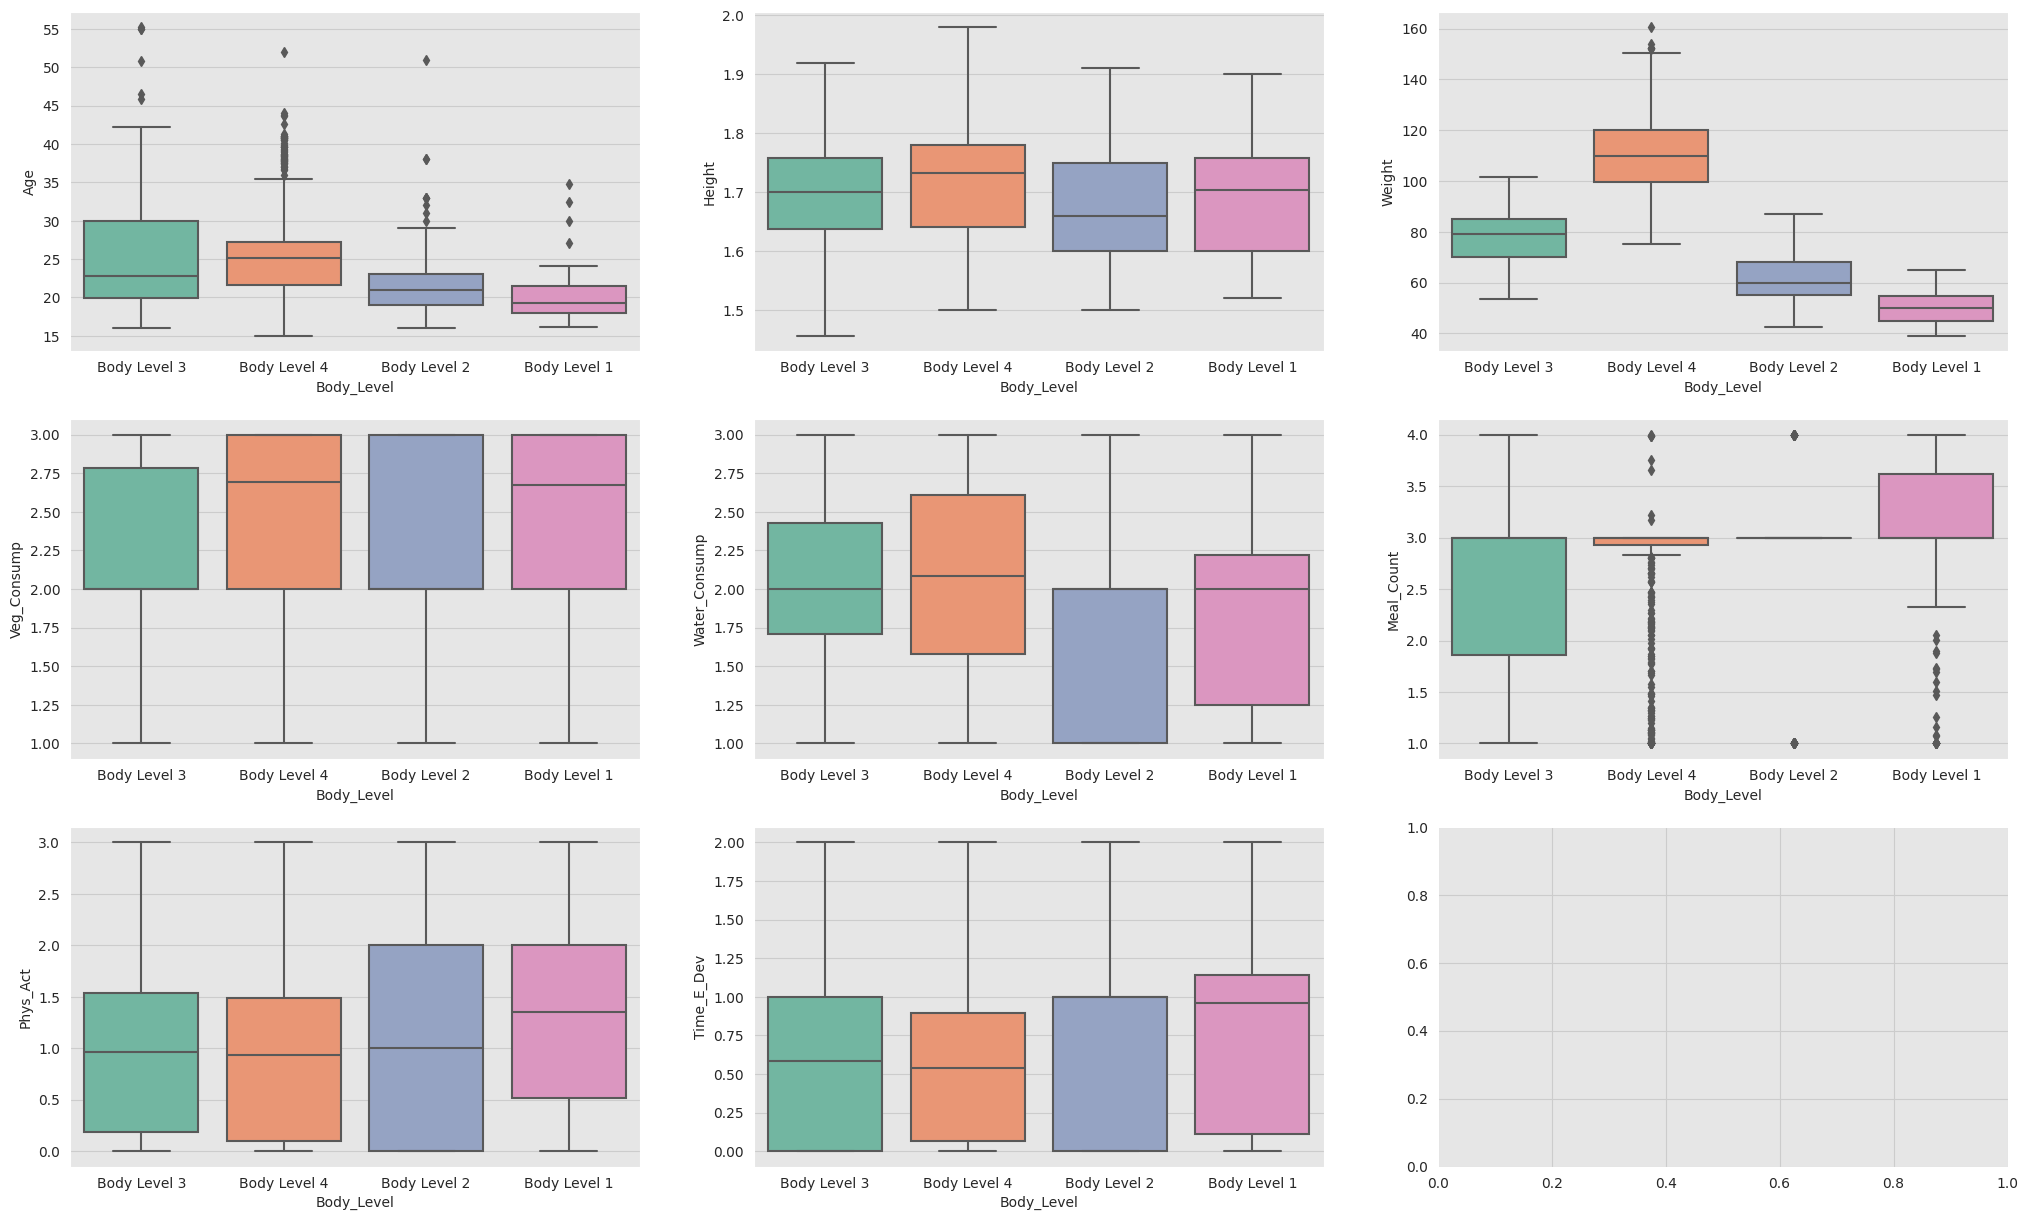

In [11]:
# relationship between numerical features and target variable
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=target, y=feature, data=data,
                ax=axes[i//3, i % 3], palette='Set2')
    axes[i//3, i % 3].set_xticklabels(axes[i//3, i %
                                      3].get_xticklabels(), rotation=0, fontsize=10)

plt.savefig('../figures/dataset_analysis/numerical_features_boxplot.png',
            dpi=300, bbox_inches='tight')
# plt.show()


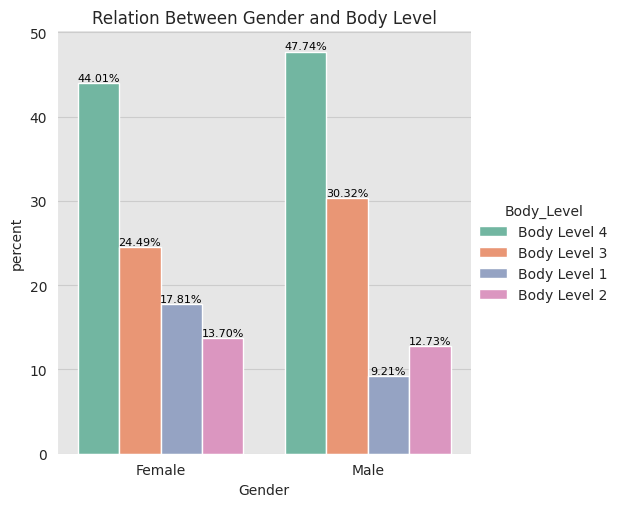

In [39]:
# relationship between gender features and target variable

df = data.groupby('Gender')[target].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()

g = sns.catplot(x='Gender', y='percent', hue=target,
                kind='bar', data=df, palette='Set2')

# add percentages
for p in g.ax.patches:
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}%'.format(p.get_height()),
              fontsize=8, color='black', ha='center', va='bottom')
    
plt.title('Relation Between Gender and Body Level')
plt.savefig('../figures/dataset_analysis/gender_vs_target.png',
            dpi=300, bbox_inches='tight')

# Features Selection


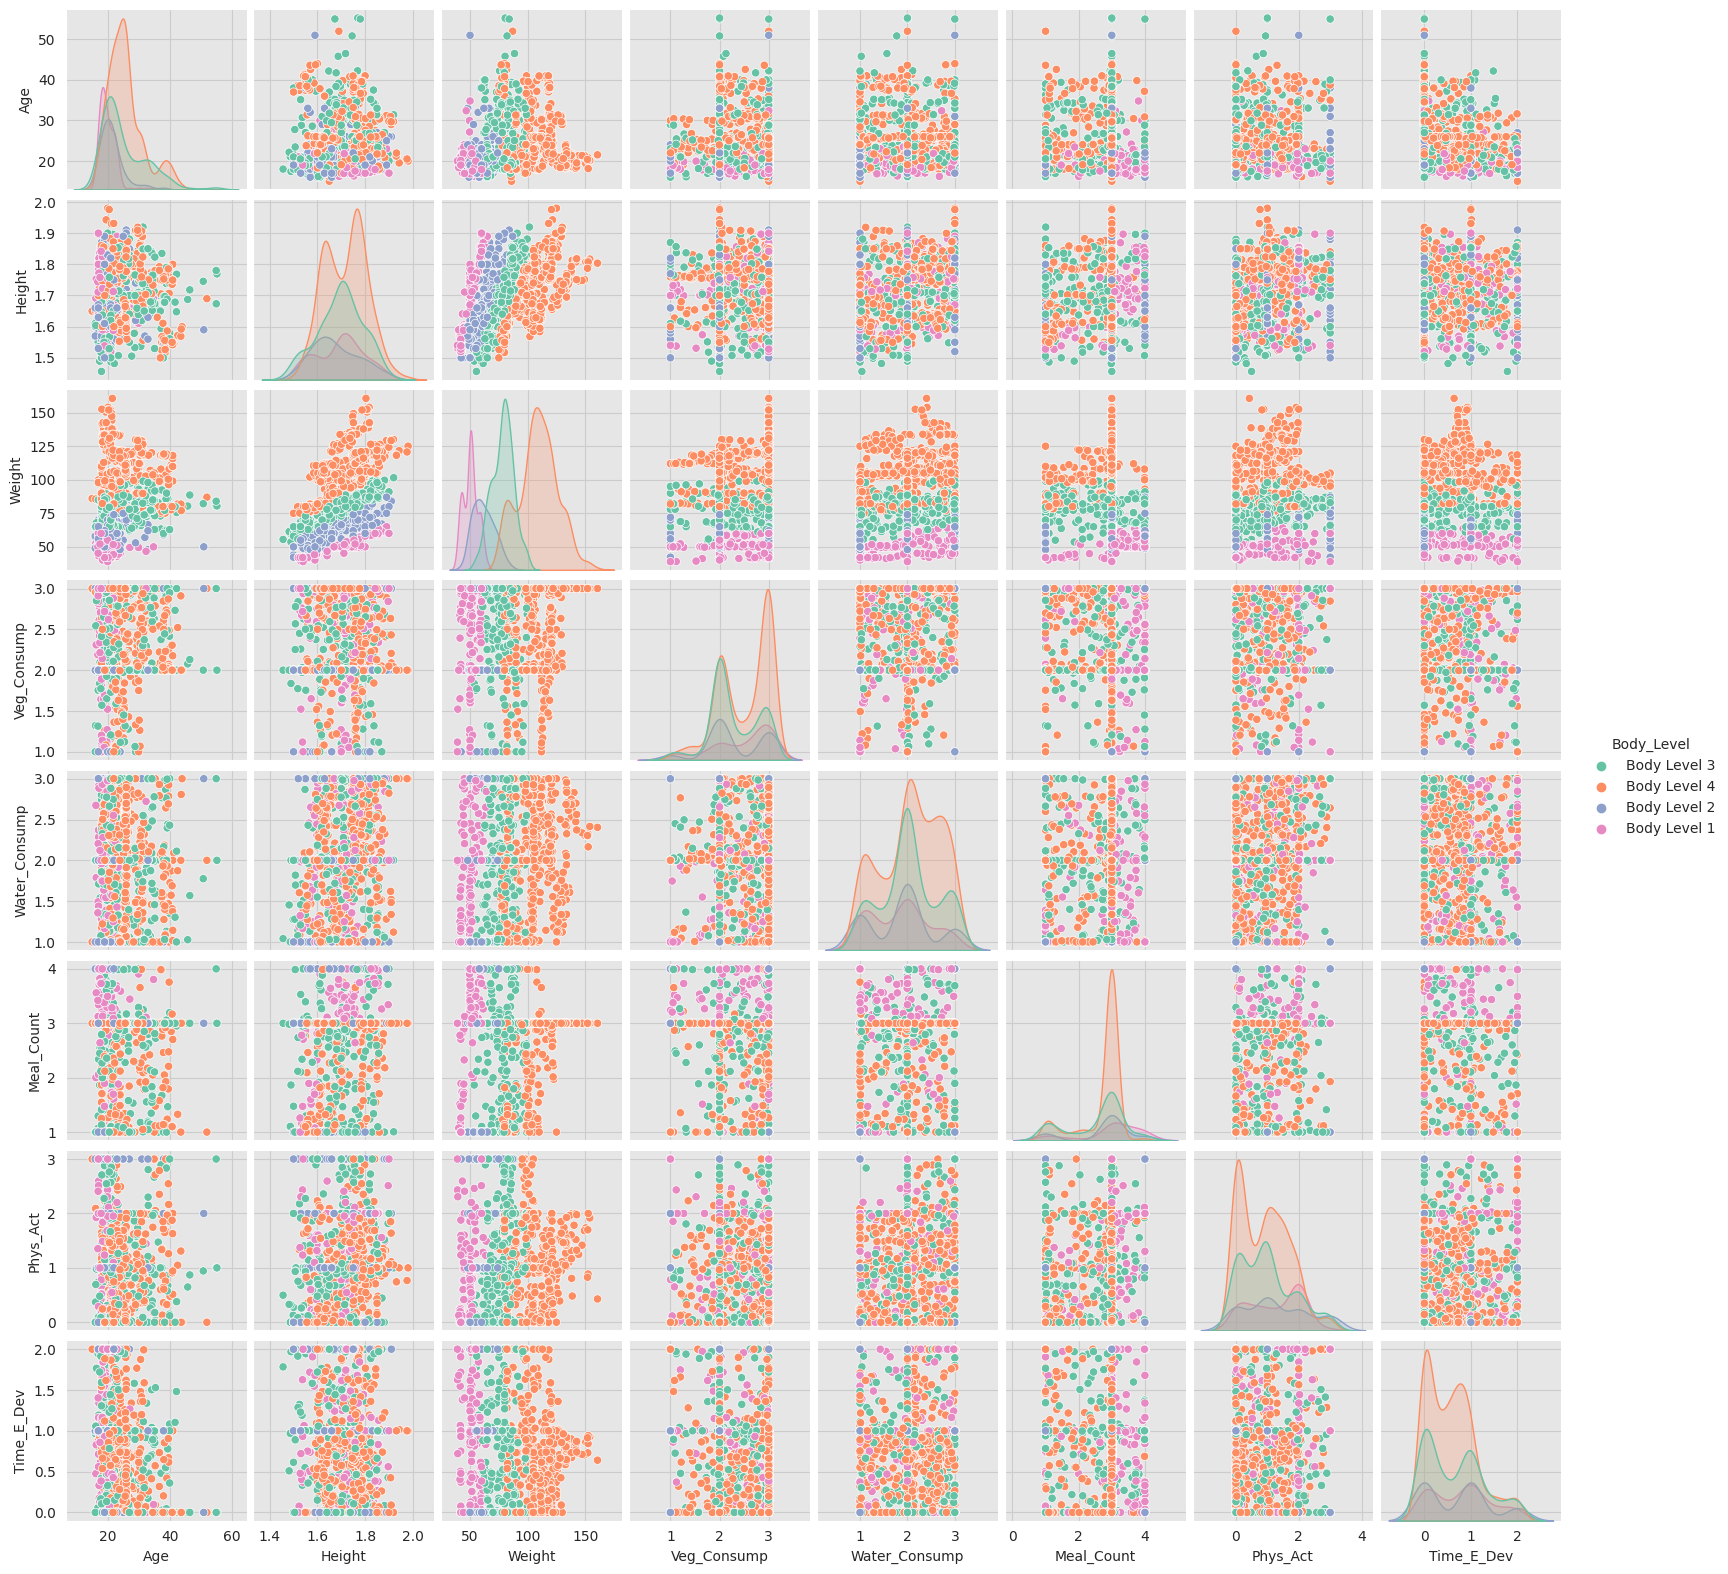

In [13]:
features = numerical_features + categorical_features
# relationship between features
sns.pairplot(data[features + [target]], hue=target,
             palette='Set2', diag_kind='kde', height=2)
plt.savefig('../figures/dataset_analysis/features_pairplot.png',
            dpi=300, bbox_inches='tight')
plt.show()


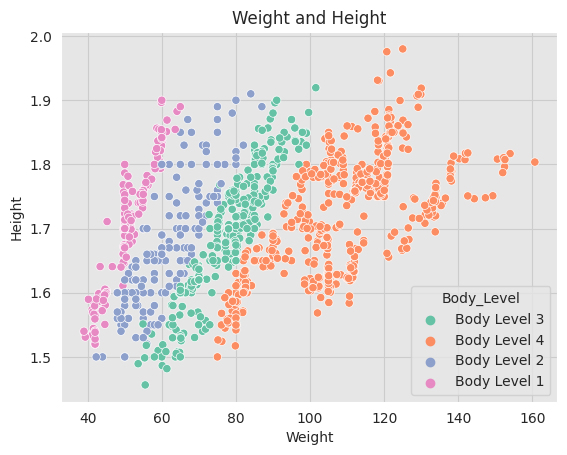

In [43]:
# zoom in weight and height
sns.scatterplot(x='Weight', y='Height', hue=target, data=data, palette='Set2')
plt.title('Weight and Height')
plt.savefig('../figures/dataset_analysis/weight_height.png',
            dpi=300, bbox_inches='tight')

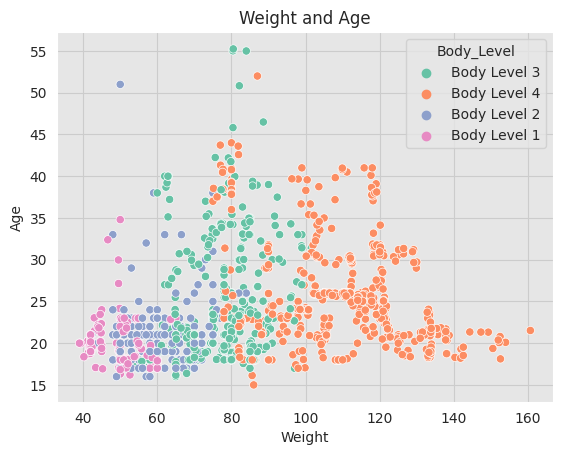

In [44]:
# zoom in weight and age
sns.scatterplot(x='Weight', y='Age', hue=target, data=data, palette='Set2')
plt.title('Weight and Age')
plt.savefig('../figures/dataset_analysis/weight_age.png',
            dpi=300, bbox_inches='tight')

In [15]:
# prepare data for training
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# categorical_features = list(set(data.columns) - set(numerical_features) - set([target]))
categorical_features = ['Alcohol_Consump']
# encode categorical features
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data[categorical_features])

# transform data
data_encoded = enc.transform(data[categorical_features]).toarray()
data_encoded = pd.DataFrame(
    data_encoded, columns=enc.get_feature_names_out(categorical_features))

# concatenate numerical and encoded categorical features
data = pd.concat(
    [data[numerical_features], data_encoded, data[target]], axis=1)

# standardize numerical features
scaler = StandardScaler()
scaler.fit(data[numerical_features])
data[numerical_features] = scaler.transform(data[numerical_features])


In [16]:
data.head()


,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Alcohol_Consump_Always,Alcohol_Consump_Frequently,Alcohol_Consump_Sometimes,Alcohol_Consump_no,Body_Level
0,1.417175,0.027994,-0.128596,-0.755326,1.577700,0.124328,1.319517,-1.088356,0.0,0.0,0.0,1.0,Body Level 3
1,0.280526,-0.981441,0.732709,1.072382,0.277270,0.381086,-1.212943,-0.221466,0.0,0.0,1.0,0.0,Body Level 4
2,-1.003533,-1.094478,-1.205565,-0.755326,-0.012228,1.649653,1.144218,0.579045,0.0,0.0,1.0,0.0,Body Level 2
3,1.020071,0.575483,1.237887,0.922716,0.373302,0.381086,0.055502,1.380856,0.0,0.0,1.0,0.0,Body Level 4
4,2.608160,0.446271,0.953590,-0.217507,-0.220190,0.192003,-0.132168,-1.088356,0.0,0.0,0.0,1.0,Body Level 4


In [17]:
# create a simple model to predict the target variable
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


X = data[['Weight', 'Height', 'Alcohol_Consump_Always',
          'Alcohol_Consump_Frequently', 'Alcohol_Consump_Sometimes', 'Alcohol_Consump_no']]
y = data[target]

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
cv_results = cross_validate(clf, X, y, cv=10, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.9711935621706308
f1_macro:  0.9609749298522307
f1_micro:  0.9711935621706308


In [18]:
# create a simple model to predict the target variable
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

data['weightOverHeightSquared'] = data['Weight'] / data['Height'] ** 2

X = data[['weightOverHeightSquared']]
y = data[target]
y = y.map({'Body Level 1': 0, 'Body Level 2': 1, 'Body Level 3': 2,
          'Body Level 4': 3})  # encode target to numerical values

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
cv_results = cross_validate(clf, X, y, cv=10, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.6850163794331292
f1_macro:  0.553633571242291
f1_micro:  0.6850163794331292


In [19]:
# read the test data
from sklearn.metrics import f1_score
test_df = pd.read_csv('../data/test_data.csv')
test_df['weightOverHeightSquared'] = test_df['Weight'] / test_df['Height'] ** 2

clf.fit(X, y)
y_pred = clf.predict(test_df[['weightOverHeightSquared']])

# import the weighted avergae f1 score
print('f1 score: ', f1_score(test_df['Body_Level'].map(
    {'Body Level 1': 0, 'Body Level 2': 1, 'Body Level 3': 2, 'Body Level 4': 3}), y_pred, average='weighted'))


f1 score:  0.29648773197160294
